# PyTorch
## Intro to Tensors, Variables, Gradients and Optimization

In [25]:
#imports to get started
import torch
import numpy as np
import matplotlib.pyplot as plt

# What is a Tensor?

A Tensor, in simple terms, is an N dimensional array.

In torch, we must use tensors to express every aspect of our data - input features, hidden layers, weights, and output all get efficiently computed using tensors.

Lets look at a few basic operations:

In [2]:
torch.Tensor(1,3)

tensor([[-8.7926e-38,  4.5583e-41,  1.8222e-29]])

Here we see a couple of tensors.

Note one that Tensor() actually creates a FloatTensor.  Other types that could be useful are:
- LongTensor (for integers)
- DoubleTensor
- HalfTensor (so hot right now).

Note also that our new tensors are not initialized at all.  Lets instead use rand for a uniform value between [0,1] or randn for a random normal distribution.

In [3]:
x = torch.rand(1,5)
y = torch.randn(1,5)
x,y

(tensor([[ 0.0139,  0.4713,  0.6579,  0.9404,  0.7621]]),
 tensor([[-0.0392,  0.1260,  0.7251,  1.1206, -1.6042]]))

Once in tensor form, torch provides many utilities to play with, such as sum(), mean().

As a rule of thumb, methods on a tensor with "_" post-fixed are performed in-place on the tensor and will alter the tensor itself.

In [4]:
print(x.add(5)) # x is not altered
print(x)

print(x.add_(5)) # x is altered
print(x)

x.sub_(5) #reset back to where it was

tensor([[ 5.0139,  5.4713,  5.6579,  5.9404,  5.7621]])
tensor([[ 0.0139,  0.4713,  0.6579,  0.9404,  0.7621]])
tensor([[ 5.0139,  5.4713,  5.6579,  5.9404,  5.7621]])
tensor([[ 5.0139,  5.4713,  5.6579,  5.9404,  5.7621]])


tensor([[ 0.0139,  0.4713,  0.6579,  0.9404,  0.7621]])

# Variables, Gradients and the Compute History

At a high level, machine learning optimizes a function to reduce loss.  For this, we need gradients of our variables. This goes back to [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) of finding roots: Compute the derivative, compute f'(x) = 0 for x, repeat with new x.

When we wrap our Tensors in a Variable, a couple of cool things happen:

- The computation history of the variable is stored
- The gradient of the value can be computed

Lets take a look at what that means for a simple example:

Lets say we have a function y = x^2 + 0.5

dy/dx = 2x.

so at x = 1.0, we expect dy/dx = 2.0

Let's take a look at the function and then evaluate the gradient ourselves.

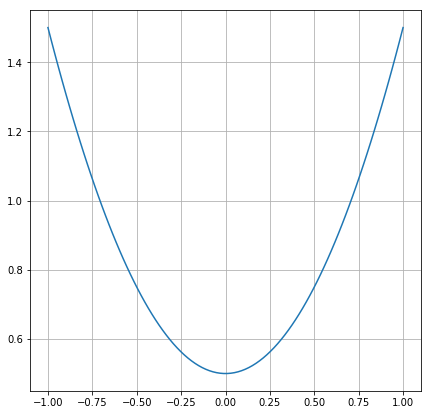

In [31]:
def y_plt(x):
    return x * x + 0.5

x = np.linspace(-1, 1, 100)
y = y_plt(x)

plt.figure(figsize=(7,7))

plt.plot(x, y)

plt.grid()
plt.show()

In [29]:
x = torch.ones(1, requires_grad=True)
y = x * x + 0.5
y.backward()
x.grad

tensor([ 2.])

Did you catch all that?
- We created a variable for x, initializing it with the value 1.0
- Then we defined y as x^2 + 0.5
- Then we called backward() to get the gradient, which, as expected
- The gradient value at x=1.0 for y=x^2 + 0.5 was 2.0

Also, lets not ignore the *history* of y, going in reverse order, add 0.5, multiply x by x

In [22]:
y.grad_fn, y.grad_fn.next_functions

(<AddBackward0 at 0x7f114e4b81d0>, ((<MulBackward1 at 0x7f114e4b84e0>, 0),))

this history also describes the operations to be performed on the graph.
in fact, when we say y = x * x + 0.5, y does not immediately get evaluated to 1.5.  This evaluation comes later, when we actually request to see the value of y.

This compute graph is a form of "lazy evaluation" - its important because our inputs -will- be massive, our computations complex.  We don't want our computer to hang every time we twiddle with our neural network.

# Optimization

OK, we've seen the basics, lets apply these simple core principles to a simple minimization problem:

for

y = (x + 0.2)^2 +4.0

find x to minimize y


Of course, the answer is -0.2, but lets see it in practice. Once again, let's plot the function before embarking on this optimization:

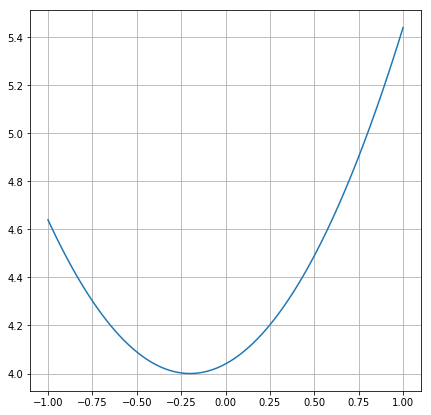

In [32]:
def y_plt(x):
    return (x + 0.2) * (x + 0.2) + 4.0

x = np.linspace(-1, 1, 100)
y = y_plt(x)

plt.figure(figsize=(7,7))

plt.plot(x, y)

plt.grid()
plt.show()

In [54]:
x = torch.ones(1, requires_grad=True)
rate = 0.1

for i in range(100):
    y = (x + 0.2) * (x + 0.2) + 4.0
    y.backward()
    delta = rate * x.grad
    x.data -= delta
    x.grad.zero_()

    print("step {:3}: {:5.2f} {:5.2f}".format(i, x[0], y[0]))
    if abs(delta[0]) < 0.001:
        break

print("Converged on solution -> x = {:5.2f} in {} iterations".format(x[0], i))

step   0:  0.76  5.44
step   1:  0.57  4.92
step   2:  0.41  4.59
step   3:  0.29  4.38
step   4:  0.19  4.24
step   5:  0.11  4.15
step   6:  0.05  4.10
step   7:  0.00  4.06
step   8: -0.04  4.04
step   9: -0.07  4.03
step  10: -0.10  4.02
step  11: -0.12  4.01
step  12: -0.13  4.01
step  13: -0.15  4.00
step  14: -0.16  4.00
step  15: -0.17  4.00
step  16: -0.17  4.00
step  17: -0.18  4.00
step  18: -0.18  4.00
step  19: -0.19  4.00
step  20: -0.19  4.00
step  21: -0.19  4.00
step  22: -0.19  4.00
step  23: -0.19  4.00
step  24: -0.20  4.00
step  25: -0.20  4.00
Converged on solution -> x = -0.20 in 25 iterations


### What was that?
Here we implimented [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) to minimize our objective function.  Easy right?

A few key notes here.
9. We use "rate" factor to make the minimization a little less aggressive.
9. We must zero our gradients between iterations - otherwise they keep increasing

Lets do the same thing, except this time, lets use a built-in pytorch optimizer for SGD.  Actually, lets make everything look more like a proper machine learning problem now.

In [60]:
from torch.optim import SGD

x = torch.ones(1, requires_grad=True)
learning_rate = rate

optimizer = SGD([x], lr = learning_rate)
for i in range(100):
    optimizer.zero_grad()
    loss = (x + 0.2) * (x + 0.2) + 4.0
    loss.backward()
    optimizer.step()

    print("step {:3}: {:5.2f} {:5.2f}".format(i, x[0], y[0]))
    if (abs(learning_rate * x.grad[0]) < 0.001):
        break
        
print("Converged on solution -> x = {:5.2f} in {} iterations".format(x[0], i))

step   0:  0.76  4.00
step   1:  0.57  4.00
step   2:  0.41  4.00
step   3:  0.29  4.00
step   4:  0.19  4.00
step   5:  0.11  4.00
step   6:  0.05  4.00
step   7:  0.00  4.00
step   8: -0.04  4.00
step   9: -0.07  4.00
step  10: -0.10  4.00
step  11: -0.12  4.00
step  12: -0.13  4.00
step  13: -0.15  4.00
step  14: -0.16  4.00
step  15: -0.17  4.00
step  16: -0.17  4.00
step  17: -0.18  4.00
step  18: -0.18  4.00
step  19: -0.19  4.00
step  20: -0.19  4.00
step  21: -0.19  4.00
step  22: -0.19  4.00
step  23: -0.19  4.00
step  24: -0.20  4.00
step  25: -0.20  4.00
Converged on solution -> x = -0.20 in 25 iterations


Look familiar?  It should!

### Loss
We've replaced "y" with "loss" to begin speaking the language of Machine Learning.

### Learning Rate
We've also gotten a look at our first "hyper-parameter": The learning rate.  We must be careful with the learning rate.  Note in the above example, if our learning rate is 1.0, we will ossilate between two values of x forever, never converging.  If we set it too low, it should converge, but it will take a long time indeed.

Usually, its better to use a smaller learning rate, then adjust upwards to find a balance between quality of result and convergence time.  IF your loss is oscillating around a value, your learning rate is likely too high.